In [1]:
import numpy as np
import matplotlib.pyplot as plt

def aggregate(m1, m2, mask):
  # aggregate 2 matrices using a mask
  inverse_mask = 1-mask # inverse mask
  return m1 * mask + m2 * inverse_mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


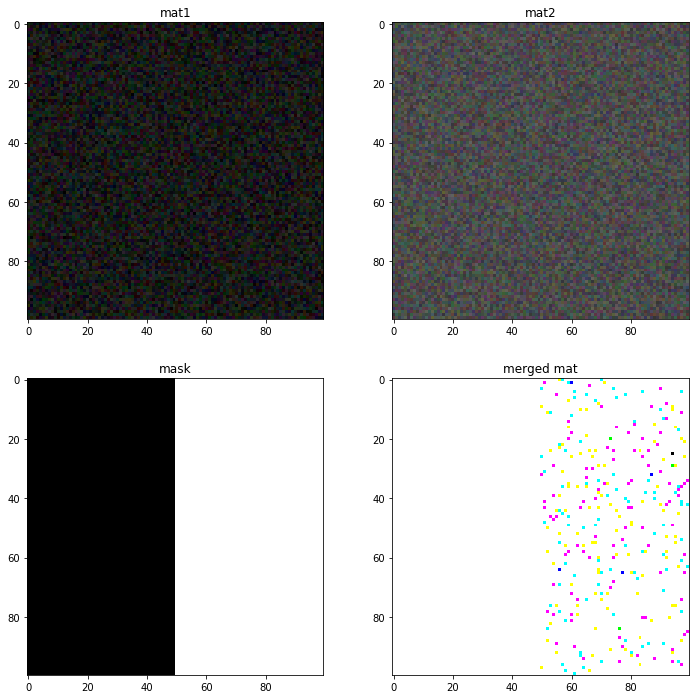

In [2]:
"""
Define our input matrices (assume these are images)
"""
N = 100
N2 = int(N/2)

mat1 = np.random.randint(low=0, high=50, size=(N,N,3)) # "rgb" image matrix 1
mat2 = np.random.randint(low=50, high=100, size=(N,N,3)) # "rgb" image matrix 2

"""
Basic "half and half" example.
"""
mask = np.zeros((N,N,3)) # binary mask initiated with all 0s
mask[:, N2:] = 1 # bottom half (y values above 50) are ones

# merged_mat will have the "first half" values come from mat1
# it will also have the "second half" values come from mat2
merged_mat = aggregate(mat1, mat2, mask)

fig, axs = plt.subplots(2,2,figsize=(12,12))

axs[0,0].set_title('mat1')
axs[0,0].imshow(mat1)
axs[0,1].set_title('mat2')
axs[0,1].imshow(mat2)
axs[1,0].set_title('mask')
axs[1,0].imshow(mask)
axs[1,1].set_title('merged mat')
axs[1,1].imshow(merged_mat)
plt.show()

In [3]:
"""
Advanced interpolated mask example.
"""

# n = n*n size of mask
# func = 
# channels = 2 or 3 depending on image (grey/color)
# steps = how many jumps/steps we want to interpolate between points

def generate_interpolated_mask(n, func, channels=3, step=5):
  # we want to generate random vertices to shape our license
  x_samples = np.arange(0, n, 5) # the x coordinates we HAVE y values for. (our random vertices)
  # in this case, we are generating vertices every 5 x values

  x_targets = np.arange(1, n)
  x_targets = np.setdiff1d(x_targets, x_samples) # the x coordinates for which we WANT interpolated Y values.

  # lets use a sin wave to distinguish our mask:
  y_samples = np.round(func(x_samples, n)).astype(np.int64)

  # So... right now, x_samples is just an array of numbers from 0-N, but counting by 5s.
  # also, our y_samples is just an array of numbers the same size as x_samples where the values are simply a sign graph (scaled to be between 0-N)
  # print('Samples Xs', x_samples)
  # print('Samples Ys', y_samples)

  # also, x_targets is simply all the X values we WANT Y values for. Ideally, these will fall along the sin curve.

  interp_ys = np.interp(x_targets, x_samples, y_samples).astype(np.int64)
  # print('\nTarget Xs', x_targets)
  # print('Interpolated Ys', interp_ys)
  
  mask = np.zeros((n, n, channels))
  for x, y in zip(x_samples, y_samples):
    mask[x, y:] = 1 # fill based on the y value
  for x, y in zip(x_targets, interp_ys):
    mask[x, y:] = 1 # fill based on the y value
  return mask

def sin_func(X, n):
  return ((np.sin(X)+1)/2)*n

def jagged_line(X, n):
  return np.abs(X+np.random.randint(low=-20, high=20, size=X.shape[0]))

def tear(m1, mask):
    return aggregate(m1,np.zeros(m1.shape),1-mask)

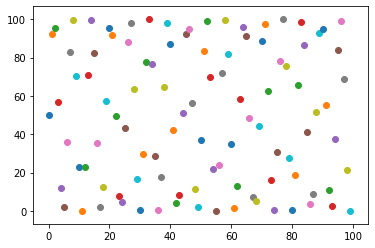

In [4]:
for a in range(100):
    plt.scatter(a,sin_func(a,100))

plt.show()

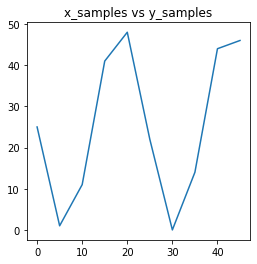

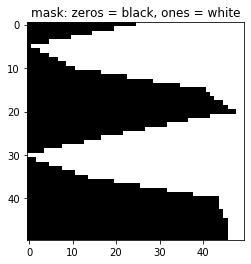

In [5]:
n = 50
func = sin_func
channels=3
step=5

# we want to generate random vertices to shape our license
x_samples = np.arange(0, n, 5) # the x coordinates we HAVE y values for. (our random vertices)
# in this case, we are generating vertices every 5 x values
# print(f'x_samples\n',x_samples,'\n')

x_targets = np.arange(1, n)
# print(f'x_targets:\n',x_targets,'\n')
x_targets = np.setdiff1d(x_targets, x_samples) # the x coordinates for which we WANT interpolated Y values.
# print(f'x_targets we want:\n',x_targets,'\n')

# lets use a sin wave to distinguish our mask:
y_samples = np.round(func(x_samples, n)).astype(np.int64)
# print(f'y_samples:\n',y_samples,'\n')

# So... right now, x_samples is just an array of numbers from 0-N, but counting by 5s.
# also, our y_samples is just an array of numbers the same size as x_samples where the values are simply a sign graph (scaled to be between 0-N)
# print('Samples Xs', x_samples)
# print('Samples Ys', y_samples)

plt.figure(figsize=(4,4))
plt.title('x_samples vs y_samples')
plt.plot(x_samples,y_samples)
plt.show()

# also, x_targets is simply all the X values we WANT Y values for. Ideally, these will fall along the sin curve.

interp_ys = np.interp(x_targets, x_samples, y_samples).astype(np.int64)
# print('\nTarget Xs\n', x_targets,'\n')
# print('Interpolated Ys\n', interp_ys,'\n')

gen_mask = np.zeros((n, n, channels))

# plt.figure(figsize=(4,4))
# plt.title('mask: zeros')
# plt.imshow(gen_mask)

for x, y in zip(x_samples, y_samples):
    gen_mask[x, y:] = 1 # fill based on the y value
for x, y in zip(x_targets, interp_ys):
    gen_mask[x, y:] = 1 # fill based on the y value
    
plt.figure(figsize=(4,4))
plt.title('mask: zeros = black, ones = white')
plt.imshow(gen_mask)

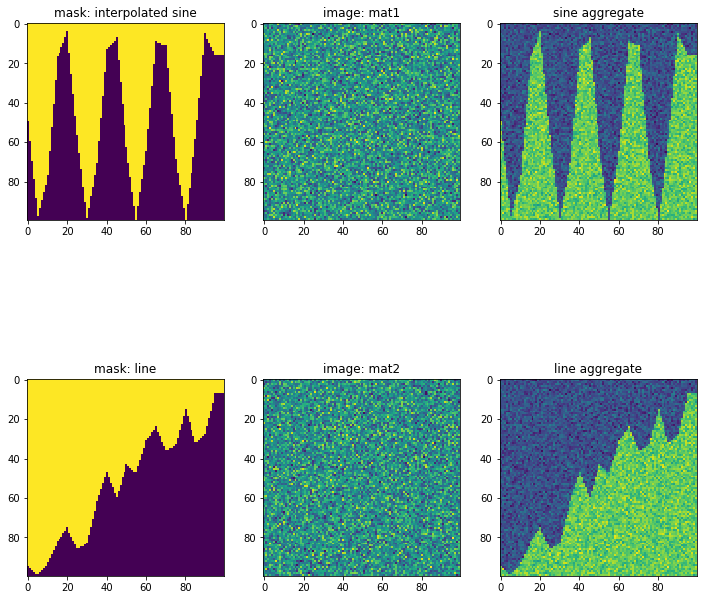

In [6]:
import matplotlib.pyplot as plt

# create 2 masks: one follows a sin curve, the other follows 
sin_mask = generate_interpolated_mask(N, sin_func)
line_mask = generate_interpolated_mask(N, jagged_line, step=5)

"""
Aggregate the matrices and graph them all
"""

fig, axs = plt.subplots(2,3,figsize=(12,12))

axs[0,0].set_title('mask: interpolated sine')
axs[0,0].imshow(np.rot90(sin_mask.sum(axis=2)))
axs[0,0].get_figure().savefig('masks/interpolated_sin.png')

axs[0,1].set_title('image: mat1')
axs[0,1].imshow(np.rot90(mat1.sum(axis=2)))
axs[0,1].get_figure().savefig('mat1.png')

axs[0,2].set_title('sine aggregate')
axs[0,2].imshow(np.rot90(aggregate(mat1, mat2, sin_mask).sum(axis=2)))
axs[0,2].get_figure().savefig('sin_aggregate.png')

axs[1,0].set_title('mask: line')
axs[1,0].imshow(np.rot90(line_mask.sum(axis=2)))
axs[1,0].get_figure().savefig('masks/interpolated_jagged_line.png')

axs[1,1].set_title('image: mat2')
axs[1,1].imshow(np.rot90(mat2.sum(axis=2)))
axs[1,1].get_figure().savefig('mat2.png')

axs[1,2].set_title('line aggregate')
axs[1,2].imshow(np.rot90(aggregate(mat1, mat2, line_mask).sum(axis=2)))
axs[1,2].get_figure().savefig('jagged_aggregate.png')

plt.show()



# NOTE: Check the file browser on the left to view images
# <------------------------------------------------------

(877, 1071, 3)
Width  X: 1071
Height Y: 877


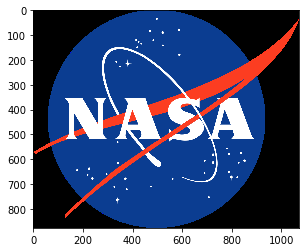

In [7]:
import cv2 as cv

# Import the image
nasa_img = cv.imread('nasa-logo.png')
plt.imshow(nasa_img)
nasa_rgb = cv.cvtColor(nasa_img, cv.COLOR_BGR2RGB)
plt.imshow(nasa_rgb)

print(nasa_rgb.shape)

nasa_rgb_x = nasa_rgb.shape[1]
nasa_rgb_y = nasa_rgb.shape[0]

print(f'Width  X:', nasa_rgb_x)
print(f'Height Y:', nasa_rgb_y)

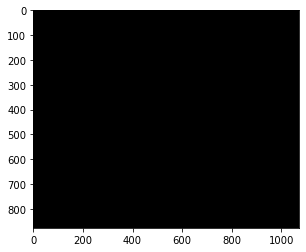

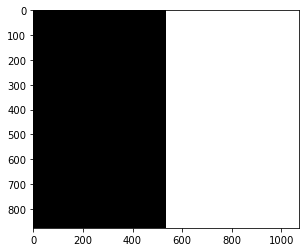

In [8]:
img_mask = np.zeros((nasa_rgb.shape[0],nasa_rgb.shape[1],3))

plt.figure()
plt.imshow(img_mask)

img_mask[:,int(nasa_rgb_x/2):] = 1 # bottom half (y values above 50) are ones
plt.figure()
plt.imshow(img_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


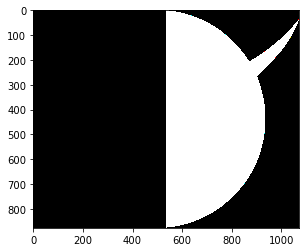

In [9]:
nasa_masked = aggregate(nasa_rgb, img_mask, img_mask)
plt.figure()
plt.imshow(nasa_masked)

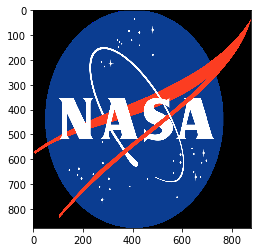

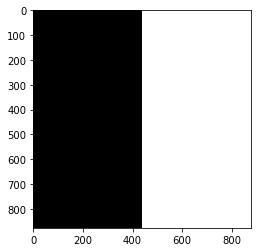

In [10]:
nasa_square = cv.resize(nasa_rgb, (nasa_rgb_y,nasa_rgb_y))
plt.figure()
plt.imshow(nasa_square)

nasa_square_mask = cv.resize(img_mask, (nasa_rgb_y,nasa_rgb_y))
plt.figure()
plt.imshow(nasa_square_mask)

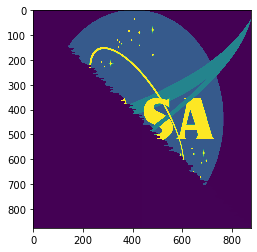

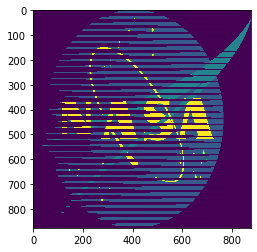

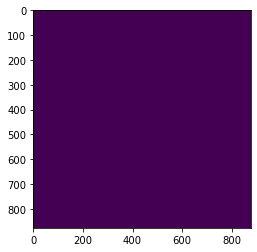

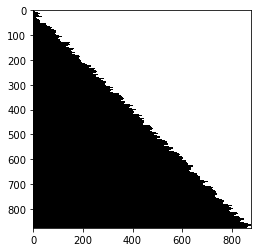

In [11]:
sin_mask = generate_interpolated_mask(nasa_rgb_y, sin_func)
line_mask = generate_interpolated_mask(nasa_rgb_y, jagged_line, step=5)

plt.figure()
plt.imshow(aggregate(nasa_square, nasa_square_mask, line_mask).sum(axis=2))

plt.figure()
plt.imshow(aggregate(nasa_square, nasa_square_mask, sin_mask).sum(axis=2)) 

plt.figure()
plt.imshow(cv.filter2D(nasa_square,-1,sin_mask).sum(axis=2))

plt.figure()
plt.imshow(line_mask)

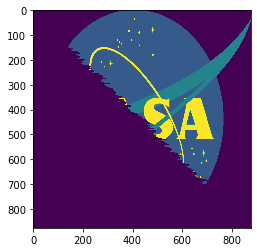

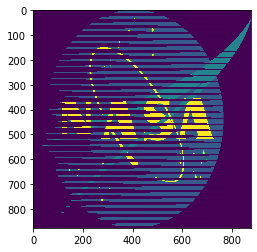

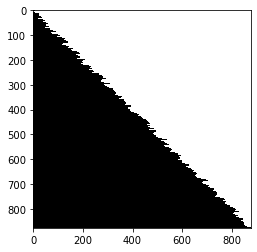

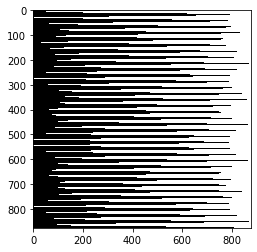

In [12]:
sin_mask = generate_interpolated_mask(nasa_rgb_y, sin_func)
line_mask = generate_interpolated_mask(nasa_rgb_y, jagged_line, step=5)

plt.figure()
plt.imshow(aggregate(nasa_square, nasa_square_mask, line_mask).sum(axis=2))

plt.figure()
plt.imshow(aggregate(nasa_square, nasa_square_mask, sin_mask).sum(axis=2))

# nasa_square = np.int32(nasa_square)
# print(nasa_square.dtype)
# print(line_mask.dtype)

# plt.figure()
# plt.imshow(cv.addWeighted(nasa_square, 0.5, sin_mask, 0.5, 0))


# plt.figure()
# plt.imshow(cv.filter2D(nasa_square,-1,line_mask).sum(axis=2))

plt.figure()
plt.imshow(line_mask)

plt.figure()
plt.imshow(sin_mask)